<a href="https://colab.research.google.com/github/jesminmousumy/Python-Programming/blob/main/Exercise_4_Building_a_Machine_Learning_Model_for_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
#import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Step 1: Download the Dataset
#Step 2: Load and Explore the Dataset
# Load the dataset
df = pd.read_csv('car_price.csv')

# Print the first few rows
print(df.head())

         ID  Price  Levy Manufacturer    Model  Prod. year   Category  \
0  45654403  13328  1399        LEXUS   RX 450        2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox        2011       Jeep   
2  45774419   8467     -        HONDA      FIT        2006  Hatchback   
3  45769185   3607   862         FORD   Escape        2011       Jeep   
4  45809263  11726   446        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0              Yes    Hybrid           3.5  186005 km        6.0   
1               No    Petrol             3  192000 km        6.0   
2               No    Petrol           1.3  200000 km        4.0   
3              Yes    Hybrid           2.5  168966 km        4.0   
4              Yes    Petrol           1.3   91901 km        4.0   

  Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0     Automatic          4x4  04-May        Left wheel  Silver       12  
1   

In [73]:
#Check for missing values
print(df.isnull().sum())


ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64


Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')


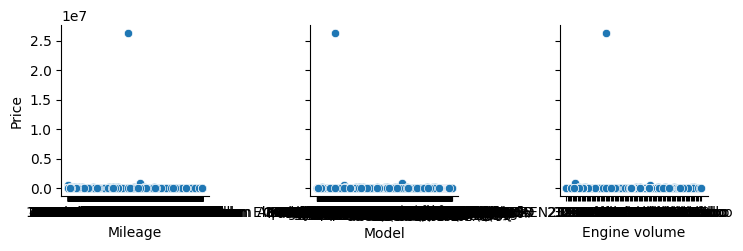

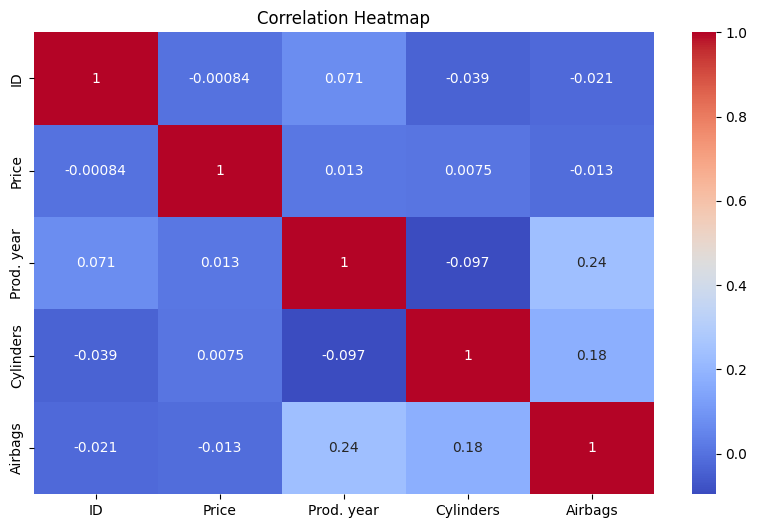

In [76]:
#Step 3 Perform Exploratory Data Analysis(EDA)
#Visualize relationships between features and target variables
# Check the actual column names in your DataFrame using df.columns
print(df.columns)
# Correct the column names in x_vars and y_vars if needed
# Assuming your columns are named 'Milage', 'Age', 'Engine_Size', and 'Price'
sns.pairplot(df, x_vars=['Mileage','Model','Engine volume'], y_vars=['Price'],kind='scatter')
plt.show()

#Correlation heatmap
plt.figure(figsize=(10, 6))
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

MAE: 11598.374941639924
MSE: 285358288.148189
R-squared: 0.0842060705978579


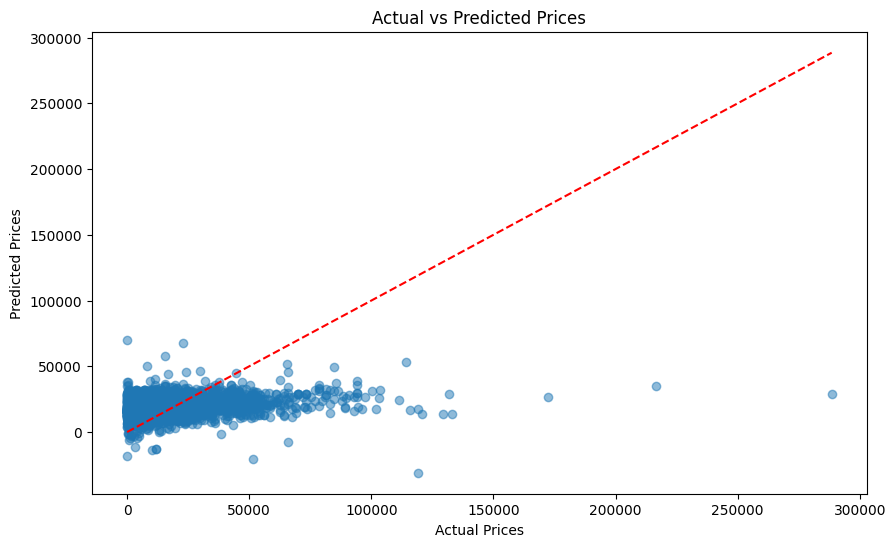

In [79]:
#Step 4: Preprocess the Data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Handle missing values (if any)
df = df.dropna()

# Convert categorical features to numeric
label_encoder = LabelEncoder()
df['Fuel type'] = label_encoder.fit_transform(df['Fuel type'])
df['Model'] = label_encoder.fit_transform(df['Model'])

# **Replace '-' with NaN and then fill NaN with 0**
# This strategy assumes that the '-' represents missing values and we want to replace them with 0 after conversion to numeric
# Before applying StandardScaler, ensure all features are numeric
for column in df.select_dtypes(include=['object']).columns:
    df[column] = pd.to_numeric(df[column].replace('-', 'NaN'), errors='coerce').fillna(0)

# Split features and target variable
X = df.drop('Price', axis=1)
y = df['Price']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Step 5: Build a Machine Learning Model

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

#Step 6: Evaluate the Model
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R-squared: {r2}')

# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

#MSE (Mean Squared Error): Measures the average squared difference between actual and predicted prices. Lower values indicate better accuracy.MAE (Mean Absolute Error): Measures the average absolute difference between actual and predicted prices. Lower values indicate better accuracy.
#R-squared: Indicates the proportion of variance in prices explained by the model. Here, 0.084 means only 8.4% of variance is explained, indicating poor performance.
#Predicted Prices: Range from 50,000 to 300,000, but the low R-squared suggests poor alignment with actual prices.
#Recommendations:Improve feature engineering and try advanced algorithms like Random Forest or XGBoost.Need to Perform hyperparameter tuning and check for outliers to enhance model performance.]